<a href="https://colab.research.google.com/github/e-albuquerque/Mecmat-1/blob/main/Circulo_de_Mohr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Equações para as tensões no sistema $(r,t)$

---



\begin{equation}
\sigma_{rr}=\frac{(\sigma_{xx}+\sigma_{yy})}{2}+\frac{(\sigma_{xx}-\sigma_{yy})}{2}\cos(2\theta)+\tau_{xy}\sin(2\theta)
\end{equation}




\begin{equation}
\tau_{rt}=-\frac{(\sigma_{xx}-\sigma_{yy})}{2}\sin(2\theta)+\tau_{xy}\cos(2\theta)
\end{equation}

# Círculo de Mohr



*   Abscissa do centro do círculo de Mohr
$$Oc = \sigma_{med}=\frac{\sigma_{xx}+\sigma_{yy}}{2}$$
*   Raio do círculo de Morh



$$ r = \sqrt{\left(\frac{\sigma_{xx}-\sigma_{yy}}{2}\right)^2+\tau_{xy}^2}$$ 


*   Equação do círculo de Mohr
$$\left(\sigma_{rr}-\sigma_{med}\right)^2+\tau_{rt}^2=r^2$$



*  Tensão normal máxima

  
$$\sigma_1=\sigma_{med}+r$$



 *  Tensão normal mínima

$$\sigma_2=\sigma_{med}-r$$

*  Tensão de cisalhamento máxima

$$\tau_{max}=r$$

*  $\sigma_1$ e $\sigma_2$ são chamadas tensões principais






In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [ ]:
sigma_xx=6
sigma_yy=4
tau_xy=3

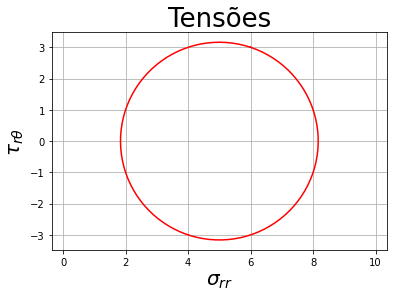

In [ ]:
npontos=100
theta=np.linspace(0,np.pi,npontos)
sigma_rr=(sigma_xx+sigma_yy)/2+(sigma_xx-sigma_yy)*np.cos(2*theta)/2+tau_xy*np.sin(2*theta)
tau_rt=-(sigma_xx-sigma_yy)/2*np.sin(2*theta)+tau_xy*np.cos(2*theta)
plt.plot(sigma_rr,tau_rt,'r-')
plt.axis("tight") # Fit the axis tightly to the plot
plt.title("Tensões",fontsize=26)
plt.xlabel(r"$\sigma_{rr}$",fontsize=20)
plt.ylabel(r"$\tau_{r\theta}$",fontsize=20)
plt.axis("equal")
plt.grid("on")
plt.show()

In [ ]:
sigma_med=(sigma_xx+sigma_yy)/2
r=np.sqrt(((sigma_xx-sigma_yy)/2)**2+tau_xy**2)
sigma_1=sigma_med+r
sigma_2=sigma_med-r
tau_max=r
print("Abscissa do centro do círuclo de Morh: ",sigma_med)
print("Raio do círculo de Mohr: ",r)
print("Tensão normal máxima: ",sigma_1)
print("Tensão normal mínima: ",sigma_2)
print("Temsão de cisalhamento máxima: ",tau_max)


Abscissa do centro do círuclo de Morh:  5.0
Raio do círculo de Mohr:  3.1622776601683795
Tensão normal máxima:  8.16227766016838
Tensão normal mínima:  1.8377223398316205
Temsão de cisalhamento máxima:  3.1622776601683795


In [ ]:

theta1=np.arctan(tau_xy/(sigma_xx-sigma_med))*180/np.pi/2
print("theta1 = ",theta1)

theta1 =  35.782525588538995


In [ ]:
theta2=np.arctan((sigma_xx-sigma_med)/tau_xy)*180/np.pi/2
print("theta2 = ",theta2)

theta2 =  9.217474411461005


# Cálculo das tensões principais usando auto-valores e auto-vetores

In [ ]:
from IPython.display import display, Markdown,Latex
# sigma = tensor de tensões
sigma=np.array([[sigma_xx,tau_xy],[tau_xy,sigma_yy]])
display(Markdown(rf'$\sigma$ = {sigma}'))

$\sigma$ = [[6 3]
 [3 4]]

## Cálculo dos auto-valores e auto-vetores

In [ ]:
w, v = LA.eig(sigma)

In [ ]:
w

array([8.16227766, 1.83772234])

In [ ]:
v

array([[ 0.81124219, -0.58471028],
       [ 0.58471028,  0.81124219]])

In [ ]:
print("Primeiro auto-valor = ",w[0])
print("Tensão normal máxima: ",sigma_1)
print("Segundo auto-valor = ",w[1])
print("Tensão normal mínima: ",sigma_2)

Primeiro auto-valor =  8.16227766016838
Tensão normal máxima:  8.16227766016838
Segundo auto-valor =  1.837722339831621
Tensão normal mínima:  1.8377223398316205


auto-vetores = $\left[\begin{array}{cc}\cos\theta_1 &\sin\theta_1\\ -\sin\theta_1&\cos\theta_1\end{array}\right]$

In [ ]:
print('auto-vetores = ', v[0][0],'\n              ',v[0][1])
print('Cosseno e seno de theta1 = ', np.cos(theta1*np.pi/180),
      '\n                          ',-np.sin(theta1*np.pi/180))

auto-vetores =  0.8112421851755609 
               -0.584710284663765
Cosseno e seno de theta1 =  0.8112421851755609 
                           -0.584710284663765
